In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import dateparser

In [3]:
import ftfy

In [4]:
from ftfy import fix_text

In [5]:
df = pd.read_csv('wine.csv')

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [8]:
df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [9]:
#import pandas_profiling

In [10]:
#pandas_profiling.ProfileReport(df)

In [11]:
df.groupby('taster_name').count()

,country,description,designation,points,price,province,region_1,region_2,taster_twitter_handle,title,variety,winery
taster_name,,,,,,,,,,,,
Alexander Peartree,415,415,268,415,413,415,401,0,0,415,415,415
Anna Lee C. Iijima,4415,4415,3508,4415,4369,4415,2448,2354,0,4415,4415,4415
Anne Krebiehl MW,3676,3685,3130,3685,3398,3676,1395,0,3685,3685,3685,3685
Carrie Dykes,139,139,96,139,138,139,139,0,0,139,139,139
Christina Pickard,6,6,2,6,6,6,6,5,6,6,6,6
Fiona Adams,27,27,17,27,27,27,18,0,27,27,27,27
Jeff Jenssen,469,491,383,491,491,469,0,0,491,491,491,491
Jim Gordon,4177,4177,2660,4177,4171,4177,4171,3087,4177,4177,4177,4177
Joe Czerwinski,5145,5147,3428,5147,5012,5145,3406,101,5147,5147,5147,5147


In [12]:
df.drop('region_2',axis=1,inplace=True)

In [13]:
df.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [14]:
#Fixes some unicode display issues
df['title'] =  df['title'].apply(fix_text)

In [15]:
df.dropna(subset=['variety'],inplace=True)

In [16]:
#Fixes some unicode display issues
df['variety'] =  df['variety'].apply(fix_text)

In [17]:
df.dropna(subset=['province'],inplace=True)

In [18]:
#Fixes some unicode display issues
df['province'] =  df['province'].apply(fix_text)

In [19]:
#should prolly drop the below
df['region_1'].isnull().sum()

21183

In [20]:
df

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [21]:
#Groupby Country and province then lists the mean which will help to fill in null values in the price range from similar provinces/countries
#new_df = df.groupby(['country','province']).mean()
new_df = df.groupby(['country','province','variety']).mean()

In [22]:
new_df.head()

points      price
country   province         variety                                         
Argentina Mendoza Province Bonarda                     86.606061  16.717172
                           Bordeaux-style Red Blend    89.905882  41.585366
                           Bordeaux-style White Blend  83.000000  14.000000
                           Cabernet Blend              88.250000  36.250000
                           Cabernet Franc              89.614035  48.228070

In [23]:
#Selects provinces from the country Australia
new_df.loc['Australia']

points      price
province          variety                                        
Australia Other   Cabernet Merlot            84.000000  12.000000
                  Cabernet Sauvignon         85.666667  11.444444
                  Cabernet Sauvignon-Merlot  88.000000  16.000000
                  Champagne Blend            83.666667  17.000000
                  Chardonnay                 85.390805  12.488095
...                                                ...        ...
Western Australia Shiraz                     89.189189  21.270270
                  Shiraz-Cabernet Sauvignon  88.500000  15.000000
                  Shiraz-Viognier            87.800000  19.400000
                  Sparkling Blend            88.000000  25.000000
                  Viognier                   86.000000  15.000000

[160 rows x 2 columns]

In [24]:
#checking to make sure its grouped correctly
new_df.loc['Italy','Sicily & Sardinia']

,points,price
variety,,
Albanello,86.000000,20.000000
Alicante,87.000000,10.000000
Bovale,89.750000,30.000000
Cabernet Blend,88.000000,16.000000
Cabernet Franc,83.500000,35.000000
Cabernet Sauvignon,88.250000,31.818182
Cabernet Sauvignon-Shiraz,86.000000,10.000000
Cannonau,87.967742,25.250000
Carignano,90.066667,36.785714


In [25]:
new_df.loc['Italy','Sicily & Sardinia'].loc['Merlot'].price

21.3

In [26]:
#now to fill the null price values from the mean values based on country/province/variety
df['price'].isnull().sum()

8992

In [27]:
#Might Drop these rows, possibly column, depoending on complexity of recommender(or feature engineer, not sure)
df['region_1'].isnull().sum()

21183

In [28]:
new_df.head()

points      price
country   province         variety                                         
Argentina Mendoza Province Bonarda                     86.606061  16.717172
                           Bordeaux-style Red Blend    89.905882  41.585366
                           Bordeaux-style White Blend  83.000000  14.000000
                           Cabernet Blend              88.250000  36.250000
                           Cabernet Franc              89.614035  48.228070

In [41]:
#https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe

In [29]:
#Taking in each rows value  for the follwing then searching the above(see line 25) as to how it will look up the mean price for country/province/variety
def cool(country,province,variety,price):
    if np.isnan(price):
        return new_df.loc[country,province].loc[variety].price
    else:
        return price

In [30]:
df['price'] = df.apply(lambda x: cool(x['country'],x['province'],x['variety'],x['price']),axis=1)

In [31]:
#Still null value for specific off varieties, will drop
df['price'].isnull().sum()

124

In [32]:
df.head(100)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,22.763636,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...
95,France,"This is a dense wine, packed with both tannins...",NaN,88,20.000000,Beaujolais,Juliénas,Roger Voss,@vossroger,Henry Fessy 2015 Juliénas,Gamay,Henry Fessy
96,France,The wine comes from one of the cru estates fol...,NaN,88,18.000000,Beaujolais,Régnié,Roger Voss,@vossroger,Henry Fessy 2015 Régnié,Gamay,Henry Fessy
97,US,A wisp of bramble extends a savory tone from n...,Ingle Vineyard,88,20.000000,New York,Finger Lakes,Anna Lee C. Iijima,NaN,Heron Hill 2015 Ingle Vineyard Riesling (Finge...,Riesling,Heron Hill
98,Italy,"Forest floor, menthol, espresso, cranberry and...",Dono Riserva,88,30.000000,Tuscany,Morellino di Scansano,Kerin O’Keefe,@kerinokeefe,Serpaia di Endrizzi 2010 Dono Riserva (Morell...,Sangiovese,Serpaia di Endrizzi


In [34]:
#WORKED, IT FILLED IN 0 COLUMN INDEX WITH 22.76 WHICH IS MEAN for that country/province/variety

In [33]:
#dropping 124 rows with null price since they are .1 percent of entire dataframe
df.dropna(subset=['price'],inplace=True)

In [35]:
df.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,22.763636,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [37]:
#re-assesing other fields to engineer/remove
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129783 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129783 non-null  object 
 1   description  129783 non-null  object 
 2   designation  92350 non-null   object 
 3   points       129783 non-null  int64  
 4   price        129783 non-null  float64
 5   province     129783 non-null  object 
 6   region_1     108699 non-null  object 
 7   taster_name  103548 non-null  object 
 8   title        129783 non-null  object 
 9   variety      129783 non-null  object 
 10  winery       129783 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 11.9+ MB


In [36]:
#almost 100k, could incorporate beautiful soup4 to google search and scrape twitter accounts for each tasters name but that wouldnt add insight into data
df.drop('taster_twitter_handle',axis=1,inplace=True)

In [41]:
test_df = df.groupby('country').mean()

In [40]:
#test_df['C'] = np.arange(len(test_df))

In [44]:
#resetting index so can graph plot of average rating/price for each country
test_df.reset_index(inplace=True)

In [45]:
test_df.head()

,index,country,points,price
0,0,Argentina,86.709134,24.512390
1,1,Armenia,87.500000,14.500000
2,2,Australia,88.580507,35.278878
3,3,Austria,90.114956,30.684098
4,4,Bosnia and Herzegovina,86.500000,12.500000


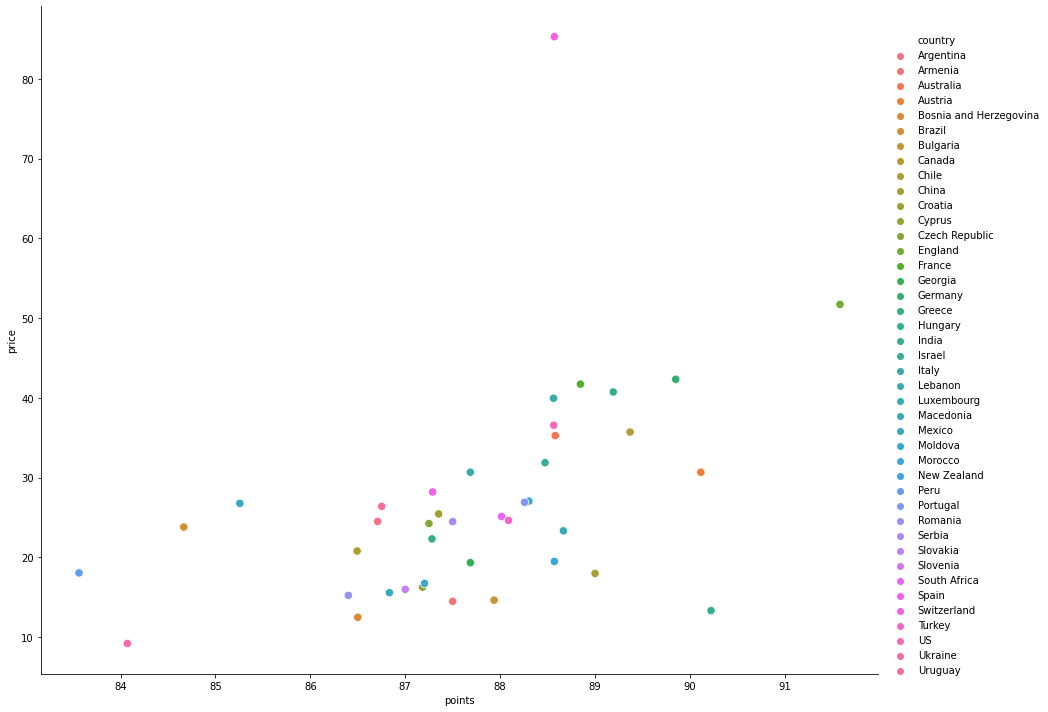

In [46]:
#based on country averages
sns.relplot(x="points", y="price", hue="country",
            height=10, aspect=1.25, data=test_df,s=70)

# Too Many Countries for Color Palette

In [47]:
len(test_df)

42

In [48]:
split_1=test_df[:14]

In [49]:
split_2=test_df[14:28]

In [50]:
split_3=test_df[28:]

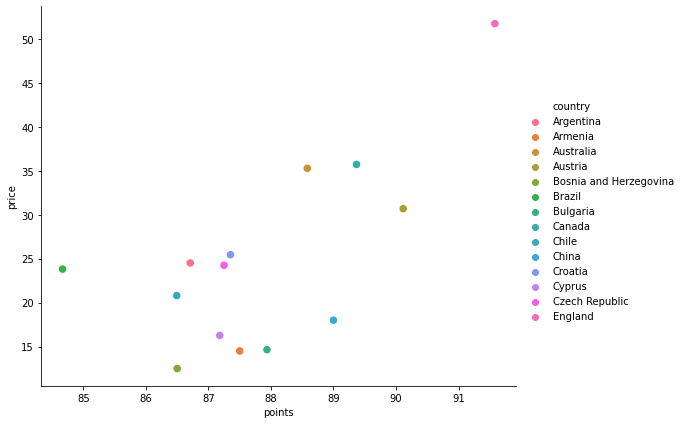

In [51]:
sns.relplot(x="points", y="price", hue="country",
            height=6, aspect=1.25, data=split_1,s=70)

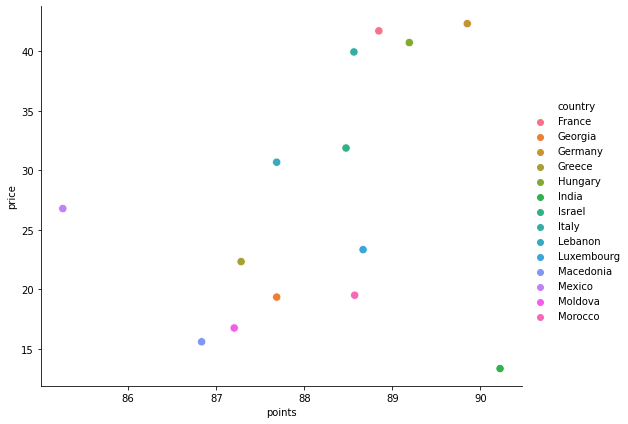

In [53]:
sns.relplot(x="points", y="price", hue="country",
            height=6, aspect=1.25, data=split_2,s=70)

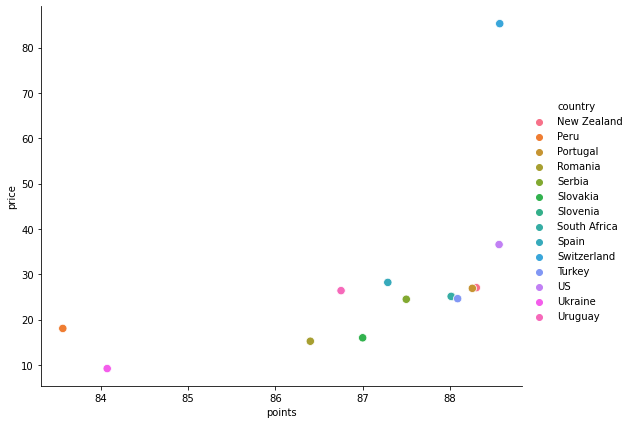

In [52]:
sns.relplot(x="points", y="price", hue="country",
            height=6, aspect=1.25, data=split_3,s=70)

# Too Many different graphs, may just make a seperate df for the top 15-20 countries based on number of wineries

In [55]:
countries = df[ ["country", "winery"] ].groupby(by="country").count().sort_values(by="winery")[::-1]
print(countries)
print(countries.index[:20])

                        winery
country                       
US                       54501
France                   22079
Italy                    19531
Spain                     6645
Portugal                  5662
Chile                     4469
Argentina                 3799
Austria                   3323
Australia                 2329
Germany                   2162
New Zealand               1419
South Africa              1375
Israel                     503
Greece                     465
Canada                     257
Hungary                    146
Bulgaria                   141
Romania                    120
Uruguay                    109
Turkey                      90
Georgia                     86
Slovenia                    82
England                     74
Croatia                     71
Mexico                      70
Moldova                     59
Brazil                      48
Lebanon                     35
Morocco                     28
Peru                        16
Ukraine 

In [56]:
df[(df['country'] == 'US') | (df['country'] =='France')].sort_values(by='country')

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.000000,Alsace,Alsace,Roger Voss,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit
100306,France,"Ripe, smooth and deliciously rounded, this is ...",Vers Chanes,91,44.000000,Burgundy,Pouilly-Fuissé,Roger Voss,Rijckaert 2015 Vers Chanes (Pouilly-Fuissé),Chardonnay,Rijckaert
42672,France,This is 100% Grenache from a vineyard planted ...,1895,87,30.000000,Rhône Valley,Côtes du Rhône Villages,Joe Czerwinski,Château Maucoil 2013 1895 Grenache (Côtes du R...,Grenache,Château Maucoil
42656,France,"A light approach to Chablis, this brings out c...",NaN,87,25.000000,Burgundy,Chablis,Roger Voss,Domaine Louis Moreau 2014 Chablis,Chardonnay,Domaine Louis Moreau
42651,France,"From a great dessert wine year, this is packed...",NaN,86,18.913793,Southwest France,Monbazillac,Roger Voss,Château la Rayre 2005 Monbazillac,Bordeaux-style White Blend,Château la Rayre
...,...,...,...,...,...,...,...,...,...,...,...
51044,US,"Baked blueberries, peppery allspice, wet grave...",Hafez,92,58.000000,California,Temecula Valley,Matt Kettmann,Fazeli Cellars 2012 Hafez Red (Temecula Valley),Red Blend,Fazeli Cellars
51045,US,"Reserved on the nose, this bottling by Billy W...",Fe Ciega Vineyard,92,66.000000,California,Sta. Rita Hills,Matt Kettmann,Foxen 2014 Fe Ciega Vineyard Pinot Noir (Sta. ...,Pinot Noir,Foxen
51047,US,"An entirely varietal wine, aged in a majority ...",Estate Vineyard,92,23.000000,California,Sonoma Coast,Virginie Boone,Gundlach Bundschu 2015 Estate Vineyard Gewürzt...,Gewürztraminer,Gundlach Bundschu
51049,US,"Aromas of plum, violets, orange peel, earth an...",NaN,92,50.000000,Washington,Walla Walla Valley (WA),Sean P. Sullivan,Va Piano 2014 Syrah (Walla Walla Valley (WA)),Syrah,Va Piano


In [57]:
#list of top 20 countries
a = ['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina',
       'Austria', 'Australia', 'Germany', 'New Zealand', 'South Africa',
       'Israel', 'Greece', 'Canada', 'Hungary', 'Bulgaria', 'Romania',
       'Uruguay', 'Turkey']

In [58]:
#Dataframe displaying wines of Top 20 countries based on number of wineries in that country
df[df.country.isin(a)].sort_values(by='country')

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
51599,Argentina,The off color of this wine is a hint that it's...,Soil Blanco de,88,17.0,Other,Río Negro Valley,Michael Schachner,Aniello 2016 Soil Blanco de Pinot Noir (Río Ne...,Pinot Noir,Aniello
37679,Argentina,"Golden in color, with a nose of gardenia, gree...",Selección,84,10.0,Mendoza Province,Mendoza,Michael Schachner,San Felipe 2010 Selección Torrontés (Mendoza),Torrontés,San Felipe
72560,Argentina,This pitch-dark Malbec from Cafayate is concen...,Grand Reserve,89,22.0,Other,Cafayate,Michael Schachner,Piattelli 2014 Grand Reserve Malbec (Cafayate),Malbec,Piattelli
37685,Argentina,"This is superdark and savory smelling, with ar...",Centenario Reserve,84,13.0,Other,San Juan,Michael Schachner,Graffigna 2010 Centenario Reserve Malbec (San ...,Malbec,Graffigna
37686,Argentina,"The nose has warm, jammy aromas that suggest h...",NaN,84,8.0,Mendoza Province,Mendoza,Michael Schachner,Kirkland Ranch 2010 Malbec (Mendoza),Malbec,Kirkland Ranch
...,...,...,...,...,...,...,...,...,...,...,...
51462,Uruguay,This blend of Pinot Noir and Chardonnay is ora...,Reserve Collection Blanc de Noir,84,20.0,Canelones,NaN,Michael Schachner,Marichal 2015 Reserve Collection Blanc de Noir...,Rosé,Marichal
25485,Uruguay,An opaque color is appropriate for this fully ...,Domaine Castelar Vineyard,89,40.0,Canelones,NaN,Michael Schachner,Familia Deicas 2015 Domaine Castelar Vineyard ...,Tannat,Familia Deicas
96750,Uruguay,Jammy blackberry and boysenberry aromas are fr...,NaN,88,16.0,Canelones,NaN,Michael Schachner,Artesana 2012 Tannat (Canelones),Tannat,Artesana
10574,Uruguay,"Grassy, leathery aromas lack ripeness and conc...",Deicas Mar de Piedras Vineyard,84,37.0,Uruguay,NaN,Michael Schachner,Familia Deicas 2015 Deicas Mar de Piedras Vine...,Tannat,Familia Deicas
